In [1]:
import keras.losses
from keras.preprocessing.image import ImageDataGenerator
import os

base_dir = os.getcwd()

train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
val_dir = os.path.join(base_dir,'val')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(train_dir,target_size=(100,100),batch_size=20, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir,target_size=(100,100),batch_size=20, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(100,100),batch_size=20, class_mode='categorical', shuffle=False)



Found 1929 images belonging to 10 classes.
Found 548 images belonging to 10 classes.
Found 287 images belonging to 10 classes.


data batch shape (20, 100, 100, 3)
label batch shape (20, 10)
sample data shape (100, 100, 3)
sample 20 labels [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


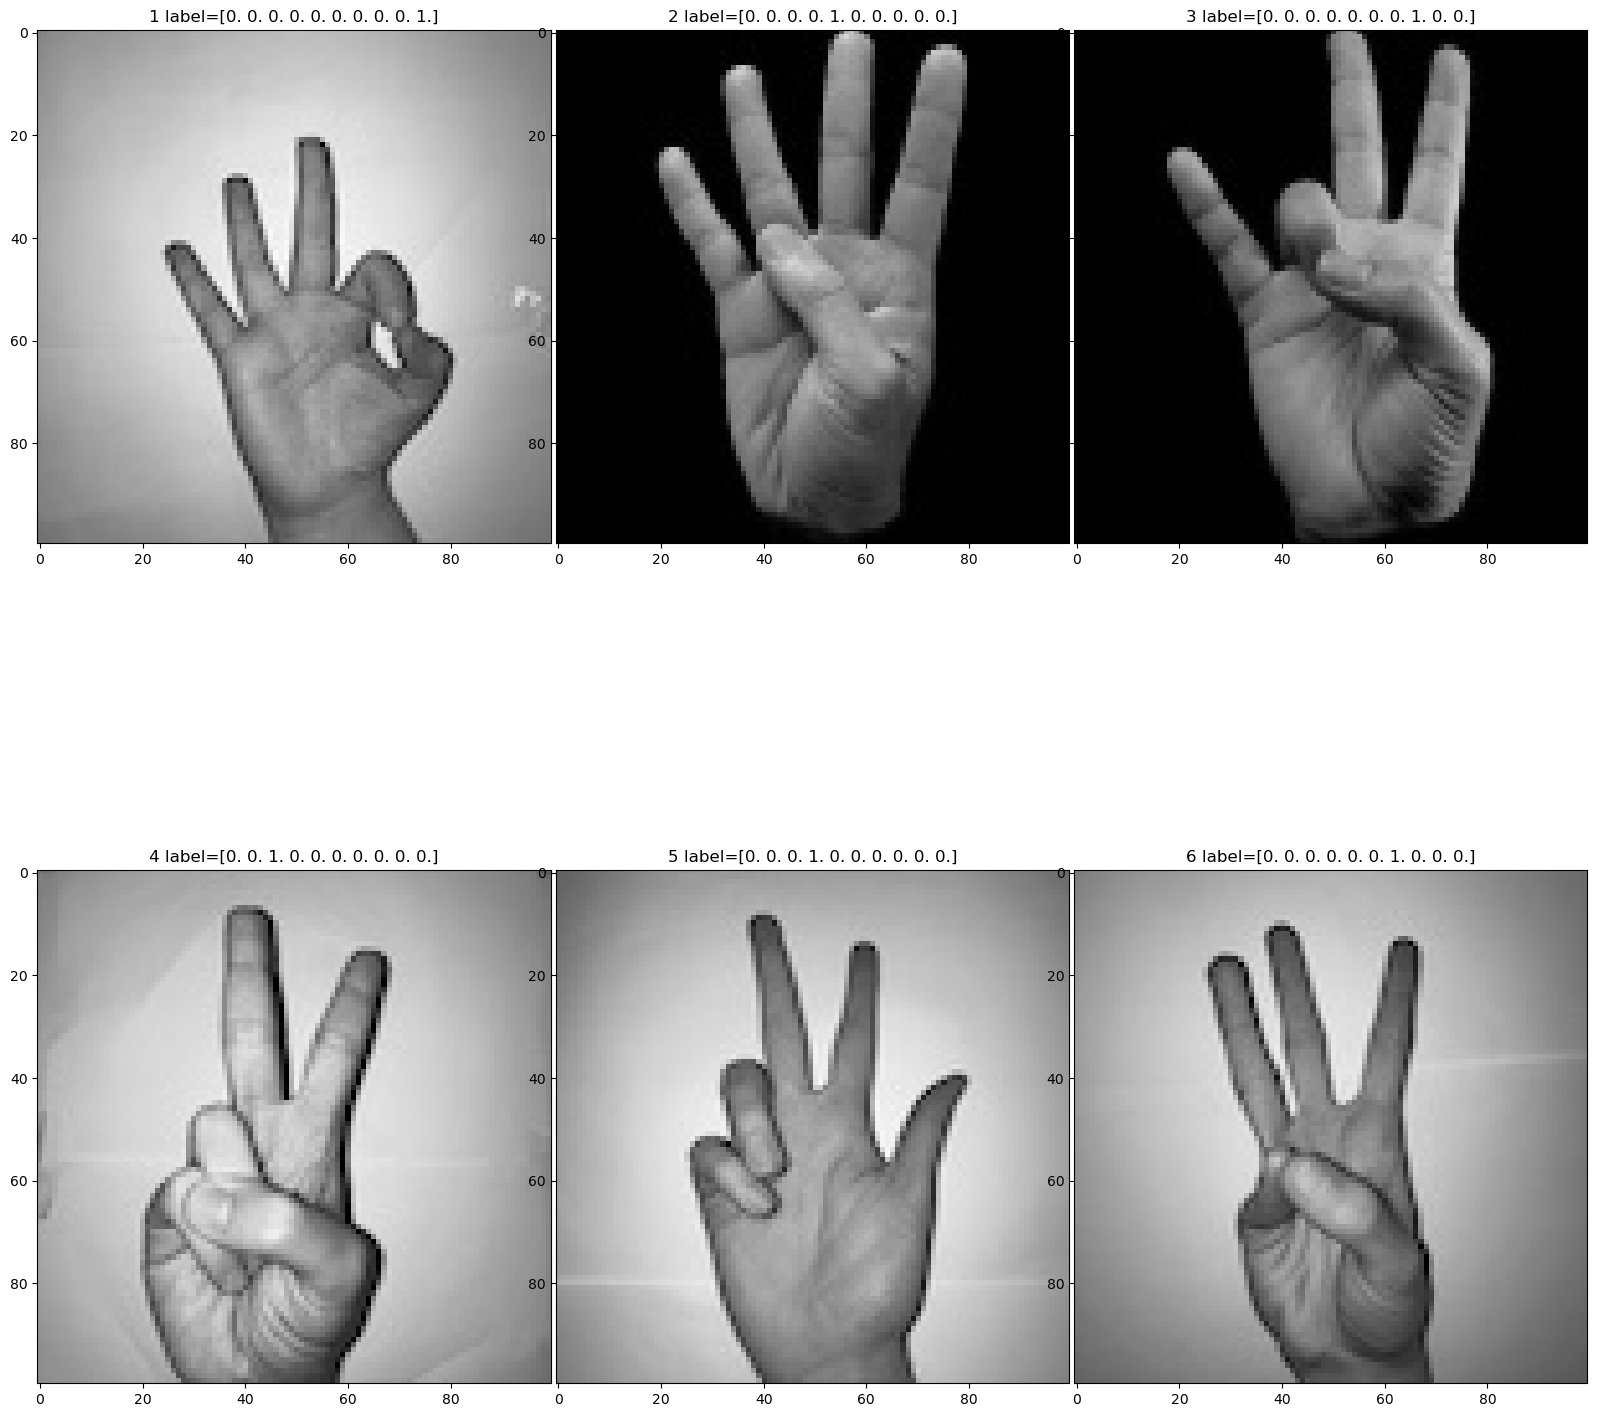

In [2]:
#test generators

import matplotlib.pyplot as plt

for data_batch, label_batch in train_generator:
    print('data batch shape', data_batch.shape)
    print('label batch shape', label_batch.shape)
    print('sample data shape', data_batch[1].shape)
    print('sample 20 labels', label_batch)
    break



fig=plt.figure(figsize=(20,20))
columns = 3
rows = 2
for i in range(1,7):
    img = data_batch[i]
    ax=fig.add_subplot(rows, columns, i)
    plt.subplots_adjust(hspace=None,wspace=0.01)
    ax.title.set_text(str(i)+" label=" + str(label_batch[i]))
    plt.imshow(img)
plt.show()

In [3]:
from keras import models, layers

network = models.Sequential()

network.add(layers.Conv2D(256, (3,3), activation= 'relu', input_shape=(100,100,3)))
network.add(layers.MaxPooling2D(2,2))

network.add(layers.Flatten())


network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10,activation='sigmoid'))



network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 256)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 614656)            0         
                                                                 
 dense (Dense)               (None, 512)               314704384 
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 314,716,682
Trainable params: 314,716,682
Non-trainable params: 0
__________________________________________

In [4]:
from keras import optimizers
network.compile(loss='categorical_crossentropy', optimizer= optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'] )


hist = network.fit(train_generator, steps_per_epoch=96, epochs=10,
                   validation_data=val_generator, validation_steps=27)


Epoch 1/10
96/96 [==============================] - 16s 139ms/step - loss: 3.1175 - acc: 0.2975 - val_loss: 1.4438 - val_acc: 0.5574
Epoch 2/10
96/96 [==============================] - 5s 50ms/step - loss: 1.0057 - acc: 0.6883 - val_loss: 0.7995 - val_acc: 0.7481
Epoch 3/10
96/96 [==============================] - 5s 49ms/step - loss: 0.4966 - acc: 0.8617 - val_loss: 0.6587 - val_acc: 0.7722
Epoch 4/10
96/96 [==============================] - 5s 49ms/step - loss: 0.2791 - acc: 0.9309 - val_loss: 0.6135 - val_acc: 0.7981
Epoch 5/10
96/96 [==============================] - 5s 49ms/step - loss: 0.1682 - acc: 0.9618 - val_loss: 0.5717 - val_acc: 0.8093
Epoch 6/10
96/96 [==============================] - 5s 50ms/step - loss: 0.0948 - acc: 0.9838 - val_loss: 0.5884 - val_acc: 0.7981
Epoch 7/10
96/96 [==============================] - 5s 50ms/step - loss: 0.0552 - acc: 0.9937 - val_loss: 0.7379 - val_acc: 0.7722
Epoch 8/10
96/96 [==============================] - 5s 49ms/step - loss: 0.0328 -

In [5]:
network.save('asl_network')

INFO:tensorflow:Assets written to: asl_network\assets


INFO:tensorflow:Assets written to: asl_network\assets


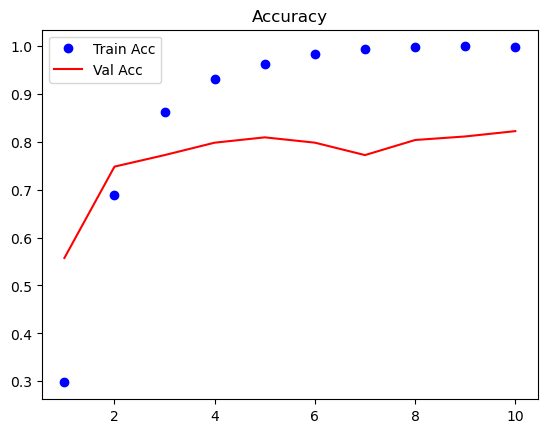

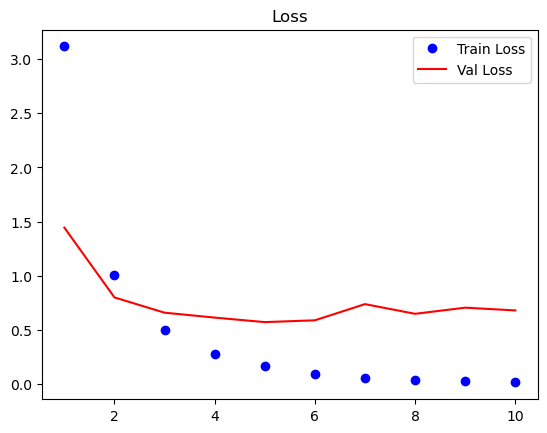

In [6]:
#plot results

import matplotlib.pyplot as plt
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo', label='Train Acc')
plt.plot(epochs,val_acc, 'r', label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs,loss,'bo', label='Train Loss')
plt.plot(epochs,val_loss, 'r', label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()




In [7]:
res = network.evaluate(test_generator, steps=14, verbose=1)
print('Accuracy on test set: %.3f' % res[1])

14/14 [==============================] - 2s 106ms/step - loss: 0.6614 - acc: 0.8393
Accuracy on test set: 0.839
